In [ ]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np

In [2]:
original = pd.read_excel("Reduced Features for TAI project.xlsx")

In [3]:
original

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,1,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,1,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,...,63032.030205,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
3,2,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0
4,2,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,96,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,...,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149,1
3558,96,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,...,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250,1
3559,96,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,...,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064,1
3560,96,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,...,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972,1


In [4]:
original.isna().sum()

Patient ID                                 0
original_shape_Elongation                  0
original_firstorder_Kurtosis               0
original_firstorder_Skewness               0
wavelet-LHL_glrlm_RunVariance              0
                                          ..
original_shape_SphericalDisproportion      0
wavelet2-HHL_glcm_Idmn                     0
wavelet2-LHH_firstorder_RootMeanSquared    0
wavelet2-HLL_firstorder_Maximum            0
Label                                      0
Length: 152, dtype: int64

The dataset has no NAN values.

In [5]:
original["Patient ID"][0]

1

In [6]:
print(original["Patient ID"].value_counts())

34    342
9     141
36    138
71    132
42    129
     ... 
95      3
1       3
91      2
87      1
81      1
Name: Patient ID, Length: 96, dtype: int64


We notice here that some patients have alot of data compared to other patients. For example patient number '34' has 342 rows of data whereas patient '81' has only 1 row of data. So we need to balance the data.

In [7]:
original_filtered = original.drop(columns=['Patient ID'])

In [8]:
original_filtered = original_filtered.T.drop_duplicates().T

In [9]:
original_filtered

,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,16.208843,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0.0
1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,8.438487,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0.0
2,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,15.858577,...,63032.030205,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0.0
3,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,7.685345,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0.0
4,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,4.956038,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,3.084912,...,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149,1.0
3558,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,11.341994,...,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250,1.0
3559,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,17.657257,...,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064,1.0
3560,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,6.464167,...,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972,1.0


In [10]:
original_filtered.groupby('Label').count()

,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,...,wavelet-HHH_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum
Label,,,,,,,,,,,,,,,,,,,,,
0.0,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
1.0,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542,...,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542


In [11]:
labels = original_filtered['Label']

In [12]:
labels

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3557    1.0
3558    1.0
3559    1.0
3560    1.0
3561    1.0
Name: Label, Length: 3562, dtype: float64

In [13]:
labels.count()

3562

In [14]:
unlabeled = original_filtered.drop(columns=['Label'])

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif
dataset = SelectKBest(f_classif, k="all").fit_transform(unlabeled, labels)

In [16]:
len(dataset)

3562

We can see that the data from the 96 patients is balanced (46 Negative cases to 50 Negative cases)

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
X_train, X_testOr, y_train, y_testOr = train_test_split(dataset, labels, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_testOr, y_testOr, test_size=0.5)

In [19]:
print(f"{len(X_train)} for training")
print(f"{len(X_val)} for validating")
print(f"{len(X_test)} for testing")

2386 for training
588 for validating
588 for testing


# SVM / SVC

In [20]:
param_grid = {
    'model__kernel': ["rbf", "linear"],
    'model__gamma' : ["auto", "scale"],
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', svm.SVC())  # Modeling step
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [21]:
best_params

{'model__gamma': 'auto', 'model__kernel': 'rbf'}

In [22]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', svm.SVC(kernel=best_params["model__kernel"], gamma=best_params["model__gamma"], probability=True))])

In [23]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [24]:
y_pred_svm = pipe.predict(X_test)
y_pred_svm_proba = pipe.predict_proba(X_test)[:,1]

In [25]:
confusion_matrix(y_test, y_pred_svm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))

Accuracy: 0.782312925170068
Precision: 0.8105263157894737
Recall: 0.6260162601626016


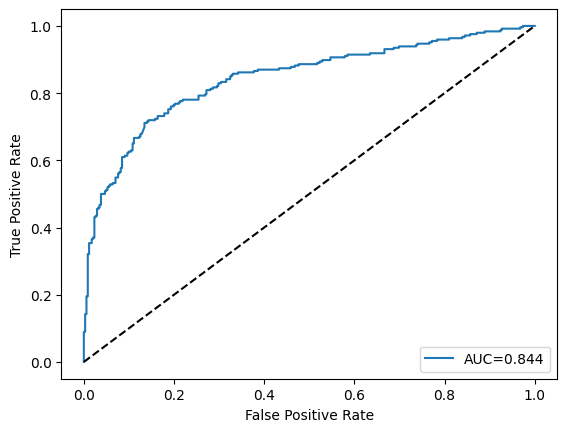

In [26]:
auc = metrics.roc_auc_score(y_test, y_pred_svm_proba)
auc = "{:.3f}".format(auc)
fprSVC, tprSVC, _ = metrics.roc_curve(y_test, y_pred_svm_proba)
plt.plot(fprSVC, tprSVC, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()

In [27]:
print(classification_report(y_test, y_pred_svm, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       342
           1       0.81      0.63      0.71       246

    accuracy                           0.78       588
   macro avg       0.79      0.76      0.77       588
weighted avg       0.79      0.78      0.78       588



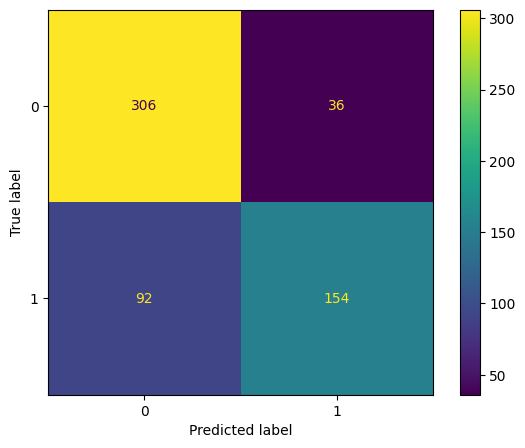

In [28]:
cm = confusion_matrix(y_test, y_pred_svm,  labels=[0,1])
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Logistic Regression

In [29]:
param_grid = {
    'model__max_iter': [500, 1000],
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', LogisticRegression())  # Modeling step
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [30]:
best_params

{'model__max_iter': 500}

In [31]:
pipe = Pipeline([("preprocessor", StandardScaler()),('logReg', LogisticRegression(max_iter=best_params["model__max_iter"]))])
pipe.fit(X_train, y_train)
y_predlr = pipe.predict(X_test)
y_predlr_proba = pipe.predict_proba(X_test)[:,1]

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predlr))
print("Precision:",metrics.precision_score(y_test, y_predlr))
print("Recall:",metrics.recall_score(y_test, y_predlr))

Accuracy: 0.7687074829931972
Precision: 0.7696078431372549
Recall: 0.6382113821138211


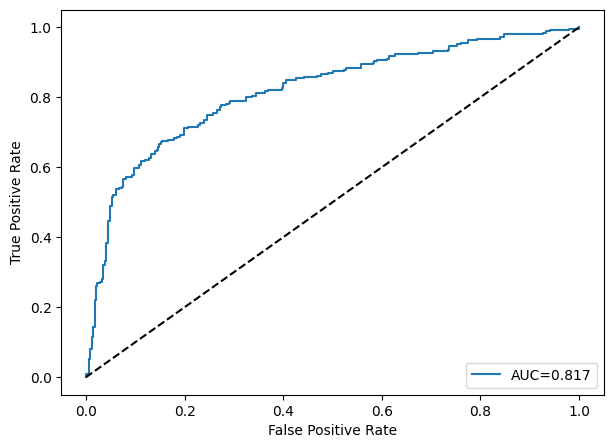

In [33]:
auc = metrics.roc_auc_score(y_test, y_predlr_proba)
auc = "{:.3f}".format(auc)
fprLR, tprLR, _ = metrics.roc_curve(y_test, y_predlr_proba)
plt.plot(fprLR, tprLR, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()

In [34]:
print(classification_report(y_test, y_predlr, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       342
           1       0.77      0.64      0.70       246

    accuracy                           0.77       588
   macro avg       0.77      0.75      0.76       588
weighted avg       0.77      0.77      0.76       588



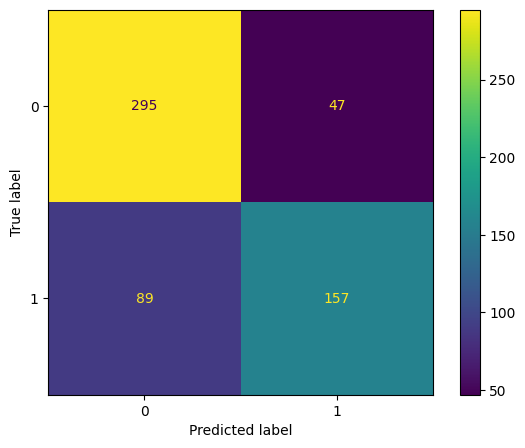

In [35]:
cm = confusion_matrix(y_test, y_predlr)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Bagging

In [36]:
param_grid = {
    'model__n_estimators': [50, 100, 200, 300],
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', BaggingClassifier())  # Modeling step
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [37]:
best_params

{'model__n_estimators': 300}

In [38]:
pipe = Pipeline([("std", StandardScaler()), ('baggC', BaggingClassifier(n_estimators=best_params["model__n_estimators"]))])
pipe.fit(X_train, y_train)
y_pred_bc = pipe.predict(X_test)
y_pred_bc_proba = pipe.predict_proba(X_test)[:,1]

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_bc))
print("Precision:",metrics.precision_score(y_test, y_pred_bc))
print("Recall:",metrics.recall_score(y_test, y_pred_bc))

Accuracy: 0.7959183673469388
Precision: 0.8214285714285714
Recall: 0.6544715447154471


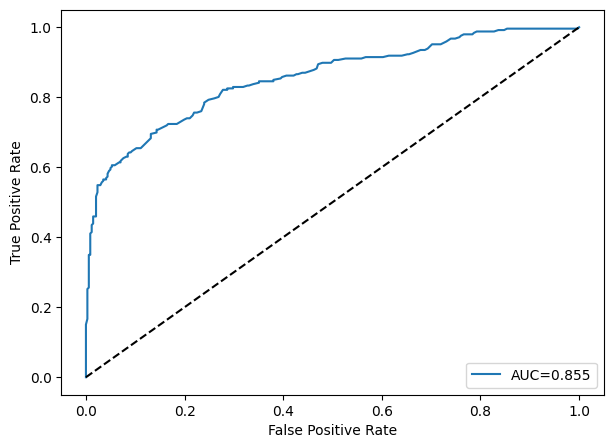

In [40]:
auc = metrics.roc_auc_score(y_test, y_pred_bc_proba)
auc = "{:.3f}".format(auc)
fprBAGGING, tprBAGGING, _ = metrics.roc_curve(y_test, y_pred_bc_proba)
plt.plot(fprBAGGING, tprBAGGING, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [41]:
print(classification_report(y_test, y_pred_bc, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       342
           1       0.82      0.65      0.73       246

    accuracy                           0.80       588
   macro avg       0.80      0.78      0.78       588
weighted avg       0.80      0.80      0.79       588



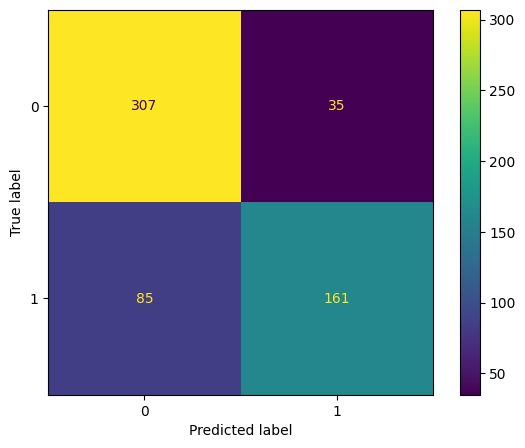

In [42]:
cm = confusion_matrix(y_test, y_pred_bc)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Adaboost

In [43]:
param_grid = {
    'model__n_estimators': [50, 100, 200, 300],
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', AdaBoostClassifier())  # Modeling step
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [44]:
best_params["model__n_estimators"]

100

In [45]:
pipe = Pipeline([('std', StandardScaler()), ('ada', AdaBoostClassifier(n_estimators=best_params["model__n_estimators"], random_state=42))])
pipe.fit(X_train, y_train)
y_predada = pipe.predict(X_test) 
y_predada_proba = pipe.predict_proba(X_test)[:,1]

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predada))
print("Precision:",metrics.precision_score(y_test, y_predada))
print("Recall:",metrics.recall_score(y_test, y_predada))

Accuracy: 0.7363945578231292
Precision: 0.6936170212765957
Recall: 0.6626016260162602


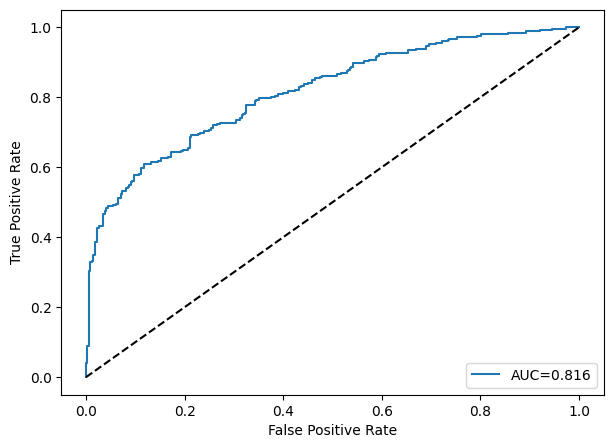

In [47]:
auc = metrics.roc_auc_score(y_test, y_predada_proba)
auc = "{:.3f}".format(auc)
fprADA, tprADA, _ = metrics.roc_curve(y_test, y_predada_proba)
plt.plot(fprADA, tprADA, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [48]:
print(classification_report(y_test, y_predada))

              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78       342
         1.0       0.69      0.66      0.68       246

    accuracy                           0.74       588
   macro avg       0.73      0.73      0.73       588
weighted avg       0.74      0.74      0.74       588



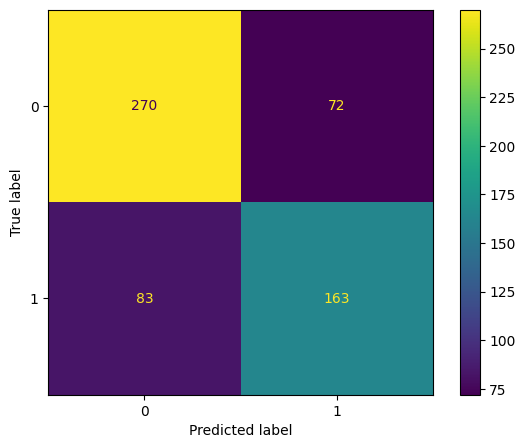

In [49]:
cm = confusion_matrix(y_test, y_predada)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Naives Bayes

In [50]:
param_grid = {
    'model__priors': [None],
    'model__var_smoothing': np.logspace(0,-9, num=100)
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', GaussianNB())  # Modeling step
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [51]:
best_params

{'model__priors': None, 'model__var_smoothing': 0.657933224657568}

In [52]:
pipe = Pipeline([("scaler", StandardScaler()),('gnb', GaussianNB(priors=best_params["model__priors"], var_smoothing=best_params["model__var_smoothing"]))])
pipe.fit(X_train, y_train)
y_prednb = pipe.predict(X_test)
y_prednb_proba = pipe.predict_proba(X_test)[:,1]

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_prednb))
print("Precision:",metrics.precision_score(y_test, y_prednb))
print("Recall:",metrics.recall_score(y_test, y_prednb))

Accuracy: 0.608843537414966
Precision: 0.5268456375838926
Recall: 0.6382113821138211


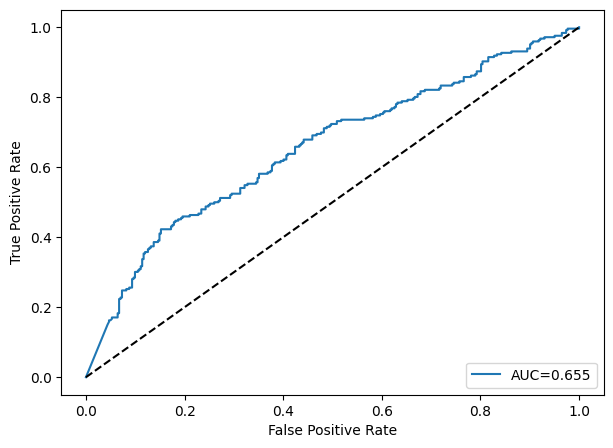

In [54]:
auc = metrics.roc_auc_score(y_test, y_prednb_proba)
auc = "{:.3f}".format(auc)
fprNB, tprNB, _ = metrics.roc_curve(y_test, y_prednb_proba)
plt.plot(fprNB, tprNB, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [55]:
print(classification_report(y_test, y_prednb, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.69      0.59      0.64       342
           1       0.53      0.64      0.58       246

    accuracy                           0.61       588
   macro avg       0.61      0.61      0.61       588
weighted avg       0.62      0.61      0.61       588



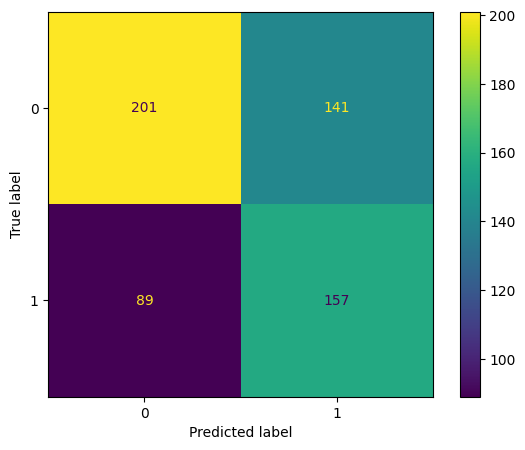

In [56]:
cm = confusion_matrix(y_test, y_prednb)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# KNN

In [57]:
arr = np.arange(1, 100, 1)

param_grid = [{
    'model__n_neighbors': arr,
    'model__leaf_size': [20, 30, 40],
    'model__weights': ['uniform', 'distance']
}]

knn = KNeighborsClassifier()

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', KNeighborsClassifier())  # Modeling step
])

In [58]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [59]:
print(f"The best params are :: n_neighbors = {best_params['model__n_neighbors']} , leaf_size= {best_params['model__leaf_size']}, weights= {best_params['model__weights']}")

The best params are :: n_neighbors = 24 , leaf_size= 20, weights= distance


In [60]:
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', KNeighborsClassifier(n_neighbors=best_params["model__n_neighbors"],  
                                     leaf_size=best_params["model__leaf_size"],
                                     weights=best_params["model__weights"] ))  # Modeling step
])

In [61]:
pipe.fit(X_train, y_train)
y_predknn = pipe.predict(X_test)
y_predknn_proba = pipe.predict_proba(X_test)[:,1]

In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predknn))
print("Precision:",metrics.precision_score(y_test, y_predknn))
print("Recall:",metrics.recall_score(y_test, y_predknn))

Accuracy: 0.7414965986394558
Precision: 0.7701149425287356
Recall: 0.5447154471544715


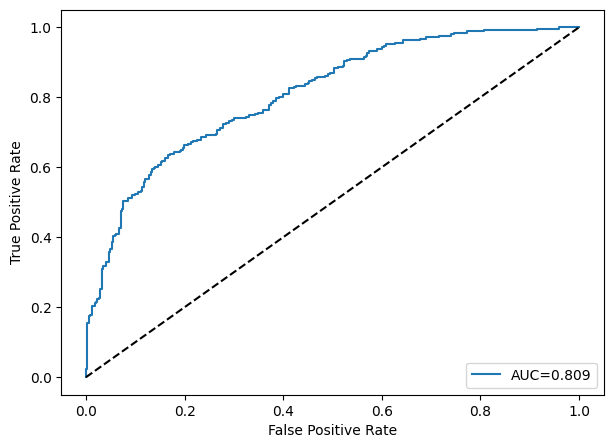

In [63]:
auc = metrics.roc_auc_score(y_test, y_predknn_proba)
auc = "{:.3f}".format(auc)
fprKNN, tprKNN, _ = metrics.roc_curve(y_test, y_predknn_proba)
plt.plot(fprKNN, tprKNN, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [64]:
print(classification_report(y_test, y_predknn, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       342
           1       0.77      0.54      0.64       246

    accuracy                           0.74       588
   macro avg       0.75      0.71      0.72       588
weighted avg       0.75      0.74      0.73       588



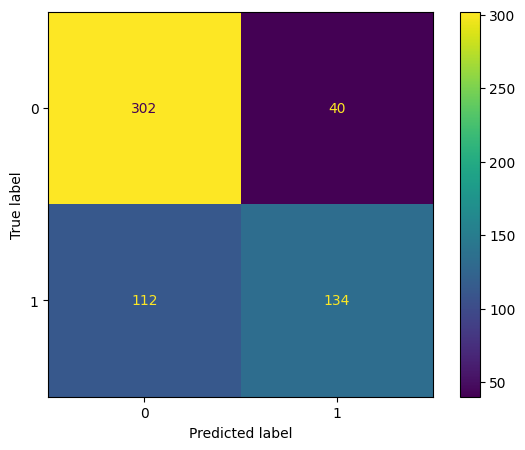

In [65]:
cm = confusion_matrix(y_test, y_predknn)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Random Forest

In [66]:
param_grid = [{
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5, 10]
}]

rf = RandomForestClassifier()
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', RandomForestClassifier())  # Modeling step
])

In [67]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [68]:
print(f"The best params are :: n_estimators = {best_params['model__n_estimators']} , max_depth = {best_params['model__max_depth']}, min_samples_split = {best_params['model__min_samples_split']}")

The best params are :: n_estimators = 200 , max_depth = None, min_samples_split = 5


In [69]:
pipefinal = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', RandomForestClassifier(n_estimators=best_params["model__n_estimators"],  
                                     max_depth=best_params["model__max_depth"], 
                                     min_samples_split=best_params["model__min_samples_split"], 
                                     random_state=42))  # Modeling step
])
pipefinal.fit(X_train, y_train)
y_predrf = pipefinal.predict(X_test)
y_predrf_proba = pipefinal.predict_proba(X_test)[:,1]

In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predrf))
print("Precision:",metrics.precision_score(y_test, y_predrf))
print("Recall:",metrics.recall_score(y_test, y_predrf))

Accuracy: 0.7891156462585034
Precision: 0.8112244897959183
Recall: 0.6463414634146342


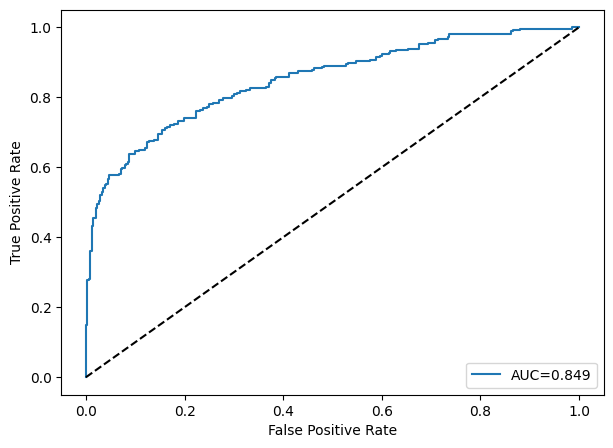

In [71]:
auc = metrics.roc_auc_score(y_test, y_predrf_proba)
auc = "{:.3f}".format(auc)
fprRF, tprRF, _ = metrics.roc_curve(y_test, y_predrf_proba)
plt.plot(fprRF, tprRF, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [72]:
print(classification_report(y_test, y_predrf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       342
           1       0.81      0.65      0.72       246

    accuracy                           0.79       588
   macro avg       0.79      0.77      0.78       588
weighted avg       0.79      0.79      0.78       588



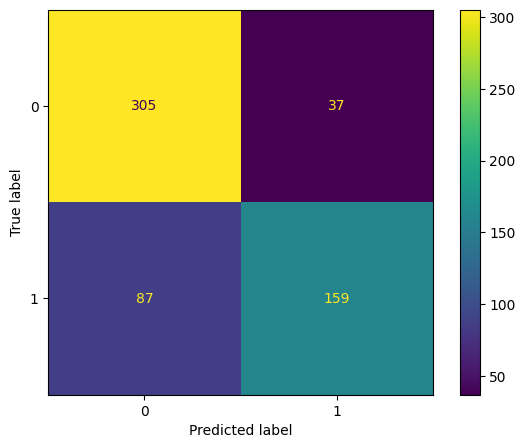

In [73]:
cm = confusion_matrix(y_test, y_predrf)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Benchmark

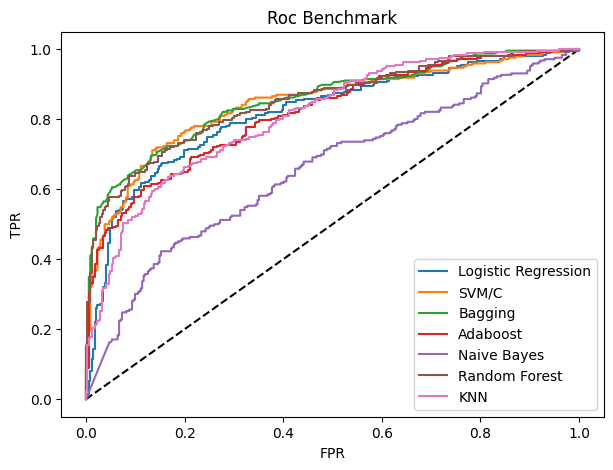

In [74]:
plt.plot([0,1],[0,1], "k--")
plt.plot(fprLR, tprLR, label= "Logistic Regression")
plt.plot(fprSVC, tprSVC, label= "SVM/C")
plt.plot(fprBAGGING, tprBAGGING, label= "Bagging")
plt.plot(fprADA, tprADA, label= "Adaboost")
plt.plot(fprNB, tprNB, label= "Naive Bayes")
plt.plot(fprRF, tprRF, label= "Random Forest")
plt.plot(fprKNN, tprKNN, label= "KNN")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Roc Benchmark')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()